# Import Library

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn
import numpy as np
import sklearn.model_selection as ms

# Data Preparation

In [77]:
df = pd.read_csv('iris.data')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [79]:
#Mengubah tipe data object pada dataframe menjadi int dari 0 sampai n
le = LabelEncoder()
for col in df:
  if df['class'].dtype == "object":
    df['class'] = le.fit_transform(df['class'])

In [80]:
df['class'].unique()

array([0, 1, 2])

Label Spesies setelah encode
0 = Setosa
1 = Versicolor
2 = Virginica

# Data Visualization

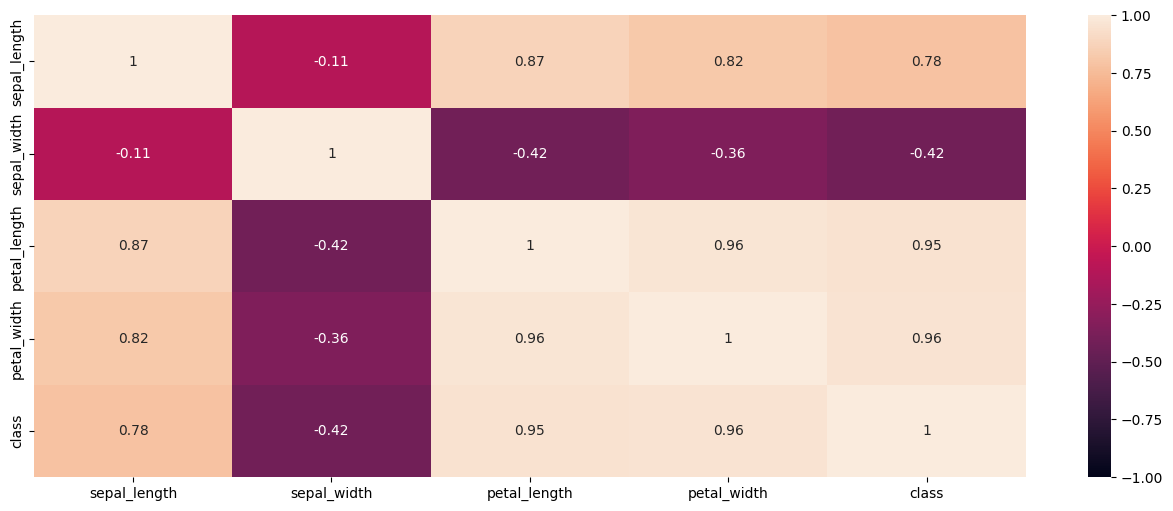

In [81]:
#Menampilkan Correlation antar data
plt.figure(figsize = (16, 6))
df_corr = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

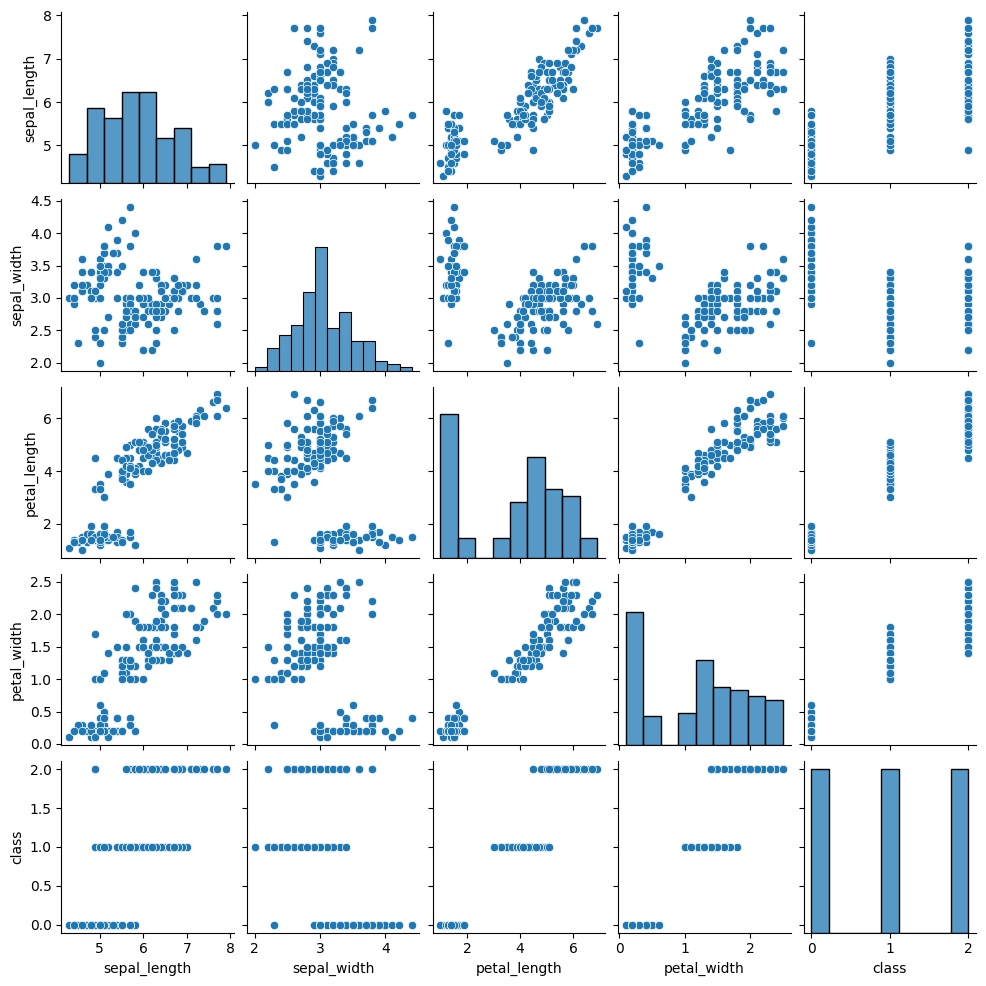

In [82]:
# Memvisualisasikan hubungan antar fitur menggunakan pair plot   
sns.pairplot(data = df, height = 2)  

In [83]:
dataset = df
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [84]:
#Menetapkan nilai untuk X dan Y
x = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = dataset['class']

In [85]:
#Memisahkan dataset
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

# Linear Regression

In [86]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [87]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))
# print("Intercept: ", clf.intercept_)
# print("Coefficients:")
# list(zip(x, clf.coef_))

Intercept:  0.14205909554958462
Coefficients:


[('sepal_length', -0.10306571323417899),
 ('sepal_width', -0.03814813336245798),
 ('petal_length', 0.22198422130391468),
 ('petal_width', 0.6130115678629073)]

In [88]:
y_pred_mlr= mlr.predict(x_test)

#Prediksi Nilai
print("Prediksi pada set tes: {}".format(y_pred_mlr))
     

Prediksi pada set tes: [ 1.90605969 -0.00458291  2.19088569 -0.0350863   1.58088865  1.99803906
 -0.15601247 -0.04402708  1.6820216   0.02758065 -0.03430498  1.94680748
  0.09740626 -0.09020604  1.90131897  1.14386928  0.94068738  1.48911519
  1.95495575  1.83500536  1.71323808  0.03398155  1.67201785  0.01335328
  1.00957196  1.65506734  1.18232776 -0.04422392  1.18548319  1.98406831
  0.91799534  1.1548201   1.46917738 -0.09502166 -0.02948936  1.27881085
 -0.05076188  1.16467926  2.07738085  2.04081048  0.06300564  1.18835698
  1.89287933  2.14928535 -0.08694462]


In [89]:
mlr_diff = pd.DataFrame({'Nilai Aktual': y_test, 'Nilai Prediksi': y_pred_mlr})
mlr_diff.head()
     

,Nilai Aktual,Nilai Prediksi
128,2,1.906060
11,0,-0.004583
118,2,2.190886
15,0,-0.035086
123,2,1.580889


<Axes: xlabel='class', ylabel='Density'>

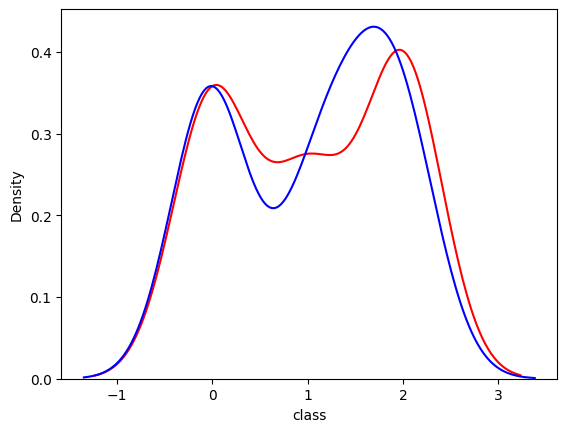

In [90]:
#Membandingkan nilai aktual dan prediksi untuk melihat seberapa baik kinerja model
ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred_mlr, color="b", label="Fitted Values" , ax=ax1)
     

## RMSE, MSE dan R<sup>2</sup>

In [91]:
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Accuracy: {:.2f}'.format(mlr.score(x,y)*100) + "%")


R squared: 93.03
Mean Absolute Error: 0.1358035104856328
Mean Square Error: 0.03494837043164172
Root Mean Square Error: 0.18694483258876593
Accuracy: 93.03%


# Decision Tree

In [92]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
     

In [93]:
y_pred_clf= clf.predict(x_test)

#Prediksi nilai untuk model classification tree
print("Prediksi pada set tes: {}".format(y_pred_clf))
     

Prediksi pada set tes: [2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1 2 2 0 1 2 2 0]


In [94]:
clf_diff = pd.DataFrame({'Nilai Aktual': y_test, 'Nilai Prediksi': y_pred_clf})
clf_diff.head()

,Nilai Aktual,Nilai Prediksi
128,2,2
11,0,0
118,2,2
15,0,0
123,2,2


In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_clf)*100))

conmat = confusion_matrix(y_test, y_pred_clf)
val = np.mat(conmat) 

classnames = list(set(y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )

print(df_cm)

Accuracy: 95.56%
    0   1   2
0  16   0   0
1   0  10   1
2   0   1  17


## Confusion Matrix

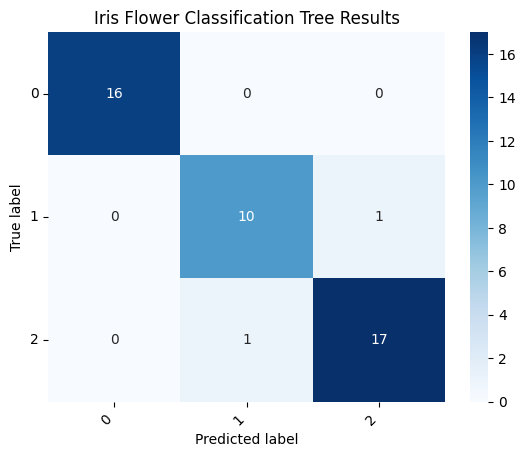

In [96]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Iris Flower Classification Tree Results')

plt.show()    
     

<Axes: xlabel='class', ylabel='Density'>

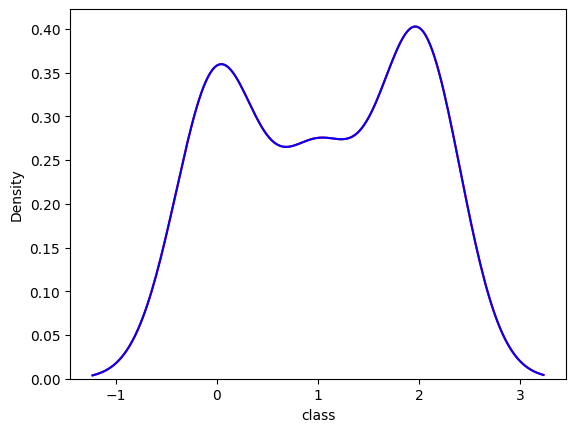

In [97]:
#Membandingkan nilai aktual dan prediksi untuk melihat seberapa baik kinerja model

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred_clf, color="b", label="Fitted Values" , ax=ax1)

# K-Means

In [98]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
## mencari kelompok terbaik ##
wcss = []
for i in range(1,11):
    method_kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    method_kmeans.fit(x_train, y_train)
    wcss.append(method_kmeans.inertia_)

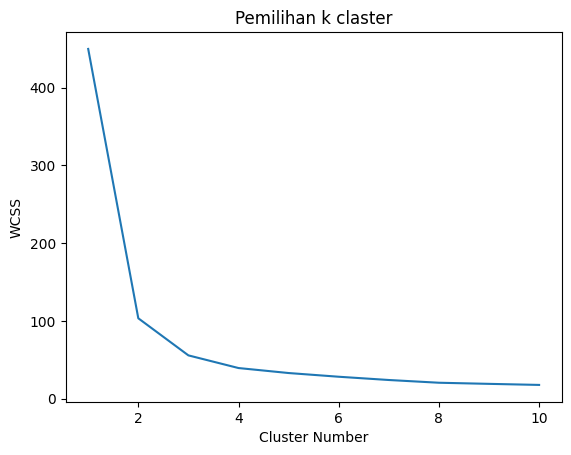

In [108]:
plt.plot(range(1,11), wcss)
plt.title('Pemilihan k claster')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

In [109]:
method_kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state = 42)
y_pred_kmeans = method_kmeans.fit_predict(x_test)
y_pred_kmeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 2, 2,
       0], dtype=int32)

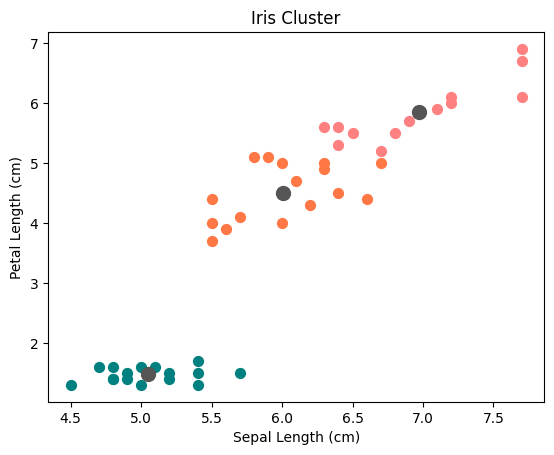

In [110]:
plt.scatter(x_test[y_pred_kmeans == 0]["sepal_length"], x_test[y_pred_kmeans == 0]["petal_length"], s = 50, c = '#008080', label = 'Cluster 1')
plt.scatter(x_test[y_pred_kmeans == 1]["sepal_length"], x_test[y_pred_kmeans == 1]["petal_length"], s = 50, c = '#FF7744', label = 'Cluster 2')
plt.scatter(x_test[y_pred_kmeans == 2]["sepal_length"], x_test[y_pred_kmeans == 2]["petal_length"], s = 50, c = '#FF8080', label = 'Cluster 3')
plt.scatter(method_kmeans.cluster_centers_[:, 0], method_kmeans.cluster_centers_[:, 2], s = 100, c = '#555555', label = 'Centroids')
plt.title('Iris Cluster')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

In [111]:
kmeans_diff = pd.DataFrame({'Nilai Aktual': y_test, 'Nilai Prediksi': y_pred_kmeans})
kmeans_diff.head()

,Nilai Aktual,Nilai Prediksi
128,2,2
11,0,0
118,2,2
15,0,0
123,2,1


<Axes: xlabel='class', ylabel='Density'>

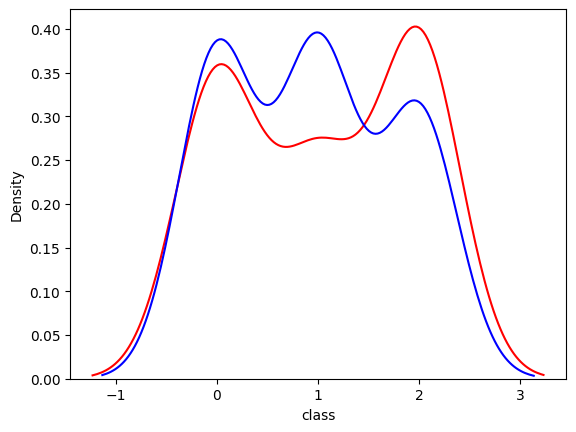

In [112]:
#Membandingkan nilai aktual dan prediksi untuk melihat seberapa baik kinerja model

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred_kmeans, color="b", label="Fitted Values" , ax=ax1)

In [113]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_kmeans)*100))

conmat = confusion_matrix(y_test, y_pred_kmeans)
val = np.mat(conmat) 

classnames = list(set(y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )

print(df_cm) 


Accuracy: 88.89%
    0   1   2
0  16   0   0
1   0  11   0
2   0   5  13


In [115]:
print("Perbandingan Akurasi pada dataset iris :")
print(f"Akurasi Linear Regresi (Nilai R-square) : {mlr.score(x,y)*100:.2f}%")
print(f"Akurasi Classification Tree : {accuracy_score(y_test, y_pred_clf)*100:.2f}%")
print(f"Akurasi K-Means Clustering : {accuracy_score(y_test, y_pred_kmeans)*100:.2f}%")


Perbandingan Akurasi pada dataset iris :
Akurasi Linear Regresi (Nilai R-square) : 93.03%
Akurasi Classification Tree : 95.56%
Akurasi K-Means Clustering : 88.89%
